## Построим карту оценки по курсу "Проектный семинар. Промышленная разработка".

Пусть у нас N человек на курсе. Для каждого из них сгенерируем два значения - количество баллов, полученных на дз и количество баллов, полученных на зачете. 

In [246]:
import random

Students = 1000


HomeWorkScore = []
for i in range(Students):
    HomeWorkScore.append(random.randint(0, 3400))
    
TestScore = []
for j in range(Students):
    TestScore.append(random.randint(0, 1300))

Теперь вычислим процент, выполненной работы за семестр. На основе этого студенту выставляется оценка.

In [247]:
ResultScore = []
for k in range(Students):
    ResultScore.append(min((HomeWorkScore[k] + TestScore[k]) // 39, 100))

Проставим каждому студенту оценку по 10-балльной системе согласно шкале перевода, представленной в техе. А также сопоставим каждой оценке цвет (это понадобится для дальнейшей отрисовки диаграммы).

In [248]:
Marks = []

Painted_marks = []

ten = (0, 0.8, 0.8)
nine = (0, 1, 0.5)
eight = (0, 1, 0)
seven = (0.9, 0.9, 0)
six = (1, 1, 0)
five = (1, 0.7, 0.3)
four = (1, 0.5, 0)
three = (1, 0.5, 0.5)
two = (1, 0, 0.5)
one = (1, 0, 0)

for r in ResultScore:
    if (r >= 0 and r <= 15):
        Marks.append(1)
        Painted_marks.append(one)
    elif (r > 15 and r <= 25):
        Marks.append(2)
        Painted_marks.append(two)
    elif (r > 25 and r <= 35):
        Painted_marks.append(three)
        Marks.append(3)
    elif (r > 35 and r <= 45):
        Marks.append(4)
        Painted_marks.append(four)
    elif (r > 45 and r <= 55):
        Marks.append(5)
        Painted_marks.append(five)
    elif (r > 55 and r <= 65):
        Marks.append(6)
        Painted_marks.append(six)
    elif (r > 65 and r <= 75):
        Marks.append(7)
        Painted_marks.append(seven)
    elif (r > 75 and r <= 85):
        Marks.append(8)
        Painted_marks.append(eight)
    elif (r > 85 and r <= 95):
        Marks.append(9)
        Painted_marks.append(nine)
    elif (r > 95 and r <= 100):
        Marks.append(10)
        Painted_marks.append(ten)
      

На данный момент имеем следующие данные:

In [249]:
import pandas as pd


data = {'HomeWorkScore':HomeWorkScore, 'TestScore':TestScore, 'ResultScore':ResultScore, 'Marks':Marks}
df = pd.DataFrame(data)
print(df)

     HomeWorkScore  TestScore  ResultScore  Marks
0             3148        116           83      8
1              157       1127           32      3
2             2632        920           91      9
3              949        164           28      3
4              383        237           15      1
..             ...        ...          ...    ...
995           1161       1030           56      6
996             40        291            8      1
997           3299         14           84      8
998           1722        334           52      5
999           2617        672           84      8

[1000 rows x 4 columns]


Нарисуем карту оценки за курс. Обратим внимание, что процент выполнения домашнего задания может превышать 100 баллов, так как за максимум было взято количество баллов без учета дополнительных заданий.

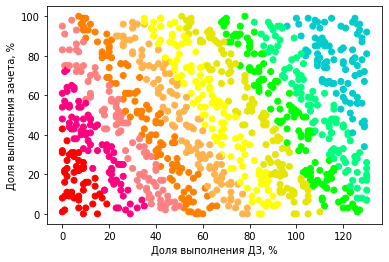

In [250]:
import matplotlib.pyplot as plt


for h in range(Students):
    HomeWorkScore[h] = HomeWorkScore[h] // 26
    TestScore[h] = TestScore[h] // 13

plt.scatter(x = HomeWorkScore, y = TestScore, c = Painted_marks)
plt.xlabel("Доля выполнения ДЗ, %")
plt.ylabel("Доля выполнения зачета, %")

plt.show()